In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sphere_ts
import gsw
import math
%matplotlib inline

In [2]:
sns.set_theme(style="whitegrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

plt.rcParams['font.size']= 15

mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.labelsize'] = 16

# Load results
Calibration file created by calibration wizard in EK80 software

## select relevant variables

In [13]:
SBcal_333 = pd.read_xml('F:/GLIDER2018/Echosounder/CalibrationDataFile-SBEcho_2019_WC22.xml', xpath=".//CalibrationResults")
SBcal_333_2 = pd.read_xml('F:/GLIDER2018/2019Cal/CalibrationDataFile-D20220819-T132543.xml', xpath=".//CalibrationResults")
SB_f = np.fromstring(SBcal_333.Frequency[0], dtype=float, sep=';')
SB_g = np.fromstring(SBcal_333.Gain[0], dtype=float, sep=';')
SB_f_m = np.fromstring(SBcal_333_2.Frequency[0], dtype=float, sep=';')
SB_g_m = np.fromstring(SBcal_333_2.Gain[0], dtype=float, sep=';')

## plot calibration results

Text(0.5, 0, 'Frequency (Hz)')

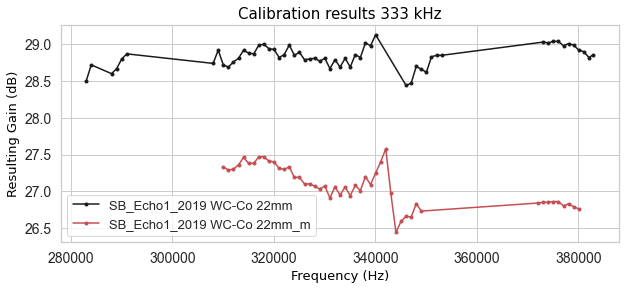

In [16]:
plt.figure(figsize=(10,4))

plt.plot(SB_f,SB_g, 'k.-',label='SB_Echo1_2019 WC-Co 22mm')
plt.plot(SB_f_m,SB_g_m, 'r.-',label='SB_Echo1_2019 WC-Co 22mm_m')
plt.legend(fontsize=13)
plt.title('Calibration results 333 kHz',title_font)
plt.ylabel('Resulting Gain (dB)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)

# plot calibrated sphere results
22 mm

In [40]:
EKcal_22_g= pd.read_csv('F:/GLIDER2018/2019Cal/CalibratedSphereTS.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
EKcal_22_m = pd.read_csv('F:/GLIDER2018/2019Cal/CalibratedSphereTS_thres_Mucal.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])

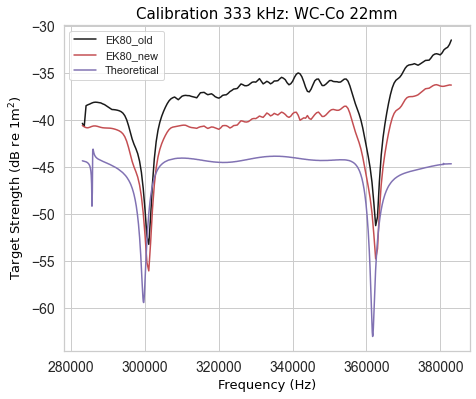

In [41]:
plt.figure(figsize=(16,6))
ax = plt.subplot(1,2,1)
plt.plot(EKcal_22_g.freqs*1000, EKcal_22_g.TS, 'k' , label='EK80_old')
plt.plot(EKcal_22_m.freqs*1000, EKcal_22_m.TS, 'r' , label='EK80_new')

#ax.axvspan(band_200_22[0], band_200_22[1], color='k', alpha=0.2)
#ax.axvspan(band_200_22_2[0], band_200_22_2[1], color='k', alpha=0.2)

plt.plot(theo22_f, theo22_TS, 'm-' , label='Theoretical')
plt.title('Calibration 333 kHz: WC-Co 22mm',title_font)
plt.ylabel('Target Strength (dB re 1m$^2$)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)
plt.legend()

Whyyyyyy so different....